### A. Import thư viện cần thiết

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

### B. Trực quan hoá

#### 1. Phân tích thống kê tổng quan

##### a. Lượt xem, lượt thích, bình luận

In [ ]:
# Xác định bảng gồm các chỉ số thống kê
# của Lượt xem, lượt thích, bình luận 

In [ ]:
#lọc dữ liệu để vẽ đồ thị

In [ ]:
# vẽ các đồ thị thể hiện phân bố của lượt xem, lượt thích, bình luận (làm tròn theo 1000)
#ví dụ x-lượt xem ,y-số video,...

In [ ]:
#=> phân bố của các chỉ số

##### b. Thời lượng video

In [ ]:
#xác định các chỉ số thống kê của thời lượng video

In [ ]:
# xác định bảng gồm thời lượng video (dưới 1p, 5 phút, 5–10 phút, trên 10 phút)
# và số video của thời lượng đó theo mốc thời gian 1 tháng 

In [ ]:
# vẽ đồ thị thể hiện tỉ lệ của các khoảng thời gian trên với mốc 1 tháng
#x-thời lượng 4 khoảng, y-số video

In [ ]:
#=> Video thời lượng bao nhiêu dễ đạt trending nhất?

##### c. Thời gian đạt trending và tồn tại trong trending

In [ ]:
trending_videos = pd.read_csv('Data/data.csv').iloc[::,1:]
trending_videos['snapshot_date'] = pd.to_datetime(trending_videos['snapshot_date'])
trending_videos['month_year'] = trending_videos['snapshot_date'].dt.to_period('M')

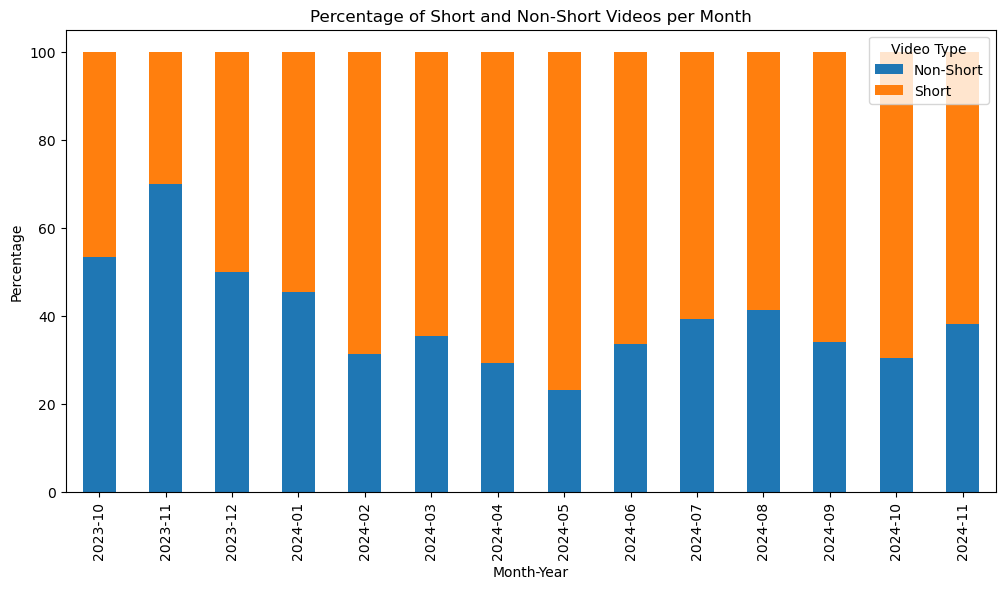

In [ ]:
short_videos = trending_videos.groupby('month_year')['is_short'].value_counts(normalize=True).unstack().fillna(0) * 100
short_videos.plot(kind='bar', figsize=(12, 6),stacked=True)
plt.title('Percentage of Short and Non-Short Videos per Month')
plt.xlabel('Month-Year')
plt.ylabel('Percentage')
plt.legend(['Non-Short', 'Short'], title='Video Type')
plt.show()

##### b. Biểu đồ thể hiện tỉ trọng của các chủ đề video

In [5]:
trending_videos = pd.read_csv('Data/data.csv')
trending_videos = trending_videos[['snapshot_date', 'category']]
trending_videos['category'] = trending_videos['category'].fillna('Unknown')
category_counts = trending_videos['category'].value_counts()
trending_videos['category'] = trending_videos['category'].apply(lambda x: x if category_counts[x] >= 800 else 'Others')
trending_videos = trending_videos.groupby(['snapshot_date', 'category']).size().unstack(fill_value=0)
trending_videos.index = pd.to_datetime(trending_videos.index)
trending_videos['month'] = trending_videos.index.to_period('M')
monthly_data = trending_videos.groupby('month').sum()
# monthly_data

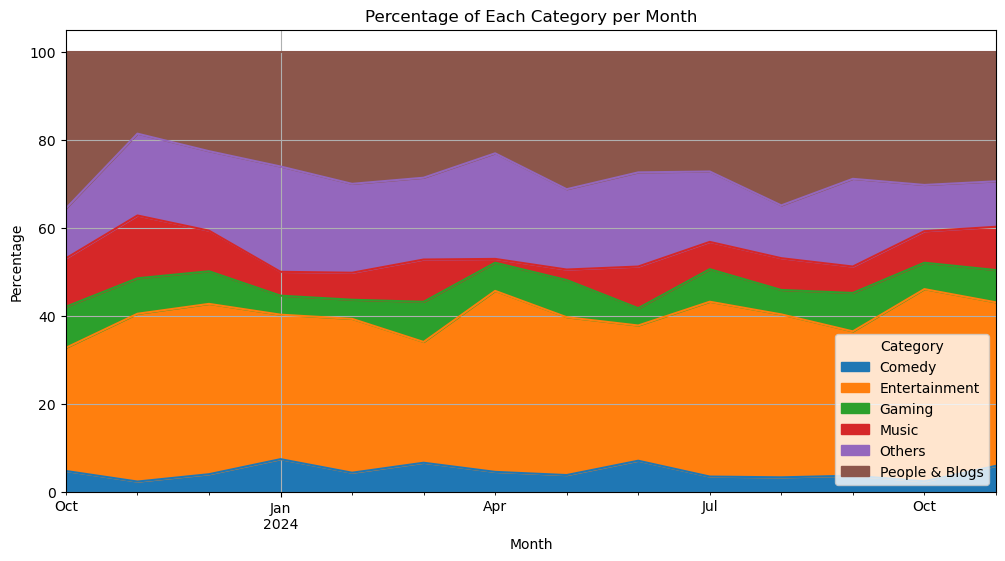

In [ ]:
category_percentage = monthly_data.div(monthly_data.sum(axis=1), axis=0) * 100
category_percentage.plot(kind='area', figsize=(12, 6))
plt.title('Percentage of Each Category per Month')
plt.xlabel('Month')
plt.ylabel('Percentage')
plt.legend(title='Category')
plt.grid(True,axis='both')
plt.show()